In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *
import time


from my_utils import *


In [2]:
data_list = unpickle("/workdir/jupyter/PASTTREC/2019-11-10_11-06-11_cosy19_ana_thr15_1000evt/cosy19_ana_data/data_list.pickle")

loading from /workdir/jupyter/PASTTREC/2019-11-10_11-06-11_cosy19_ana_thr15_1000evt/cosy19_ana_data/data_list.pickle


In [3]:
# let's find the baseline of the analog signal, loop over all 1000 events, average first 8% of the waveform
baseline_analog = 0
for dataset in data_list:
    baseline_analog += find_baseline(dataset["analog"])
baseline_analog /= float(len(data_list))

print("baseline analog")
print(baseline_analog)

baseline analog
-0.00869011183299


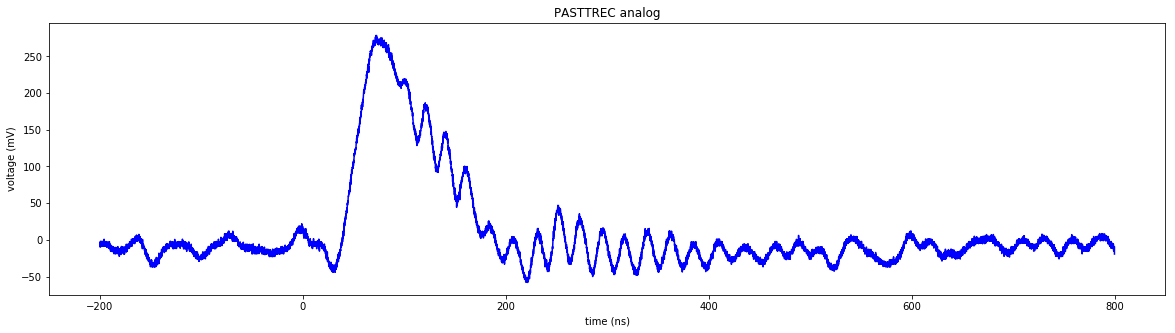

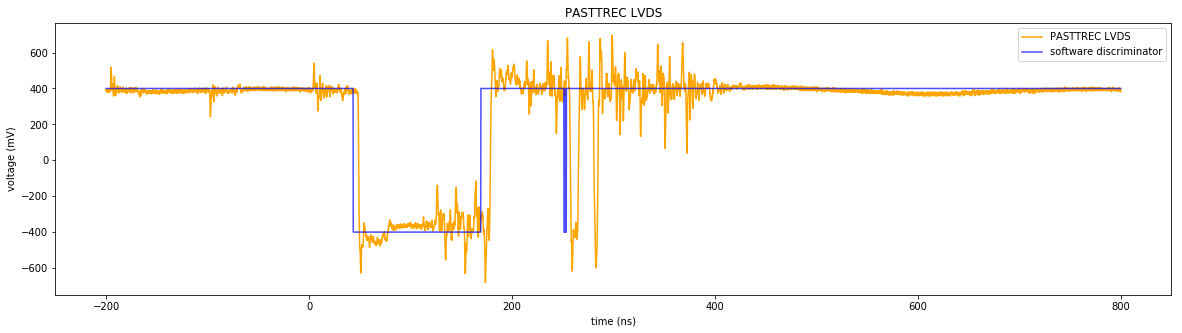

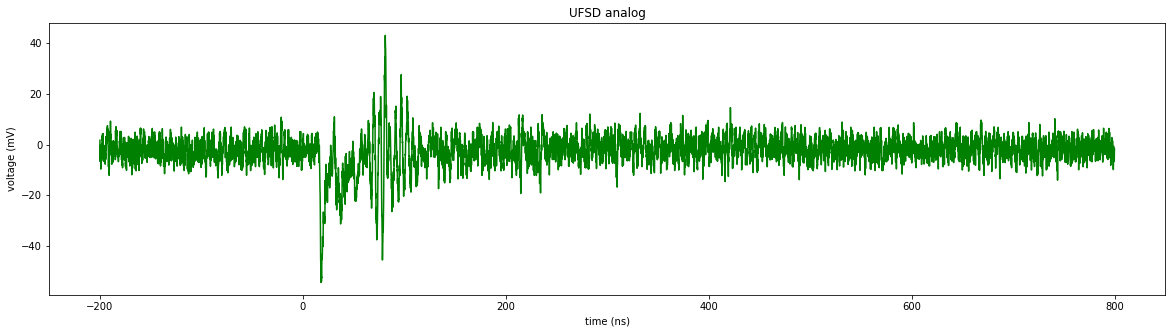

In [4]:
dataset = data_list[10]

time_ns = dataset["time"]*1e9

plt.rcParams["figure.figsize"] = (20,5)

plt.plot(time_ns,1e3*(dataset["analog"]-baseline_analog),color="blue")
plt.title("PASTTREC analog")
plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.show()

plt.plot(time_ns,1e3*dataset["LVDS"],color="orange",label="PASTTREC LVDS")
plt.plot(time_ns,
         -400+800*discriminate(time_ns,dataset["analog"], 30e-3, 8e-3,-4e-3, start=0 )[0]
                              ,color="blue",alpha=0.7,label="software discriminator")
plt.title("PASTTREC LVDS")
plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.legend()
plt.show()

plt.plot(time_ns,1e3*dataset["UFSD"],color="green")
plt.title("UFSD analog")
plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.show()


In [5]:
t1_real_list  = []
t1_soft_list  = []
tot_real_list = []
tot_soft_list = []

for dataset in data_list:
    #t1_real_list += [dataset["t1"]]
    #tot_real_list += [dataset["tot"]]
    dummy, t1_real, tot_real = discriminate(dataset["time"],-1*dataset["LVDS"],0e-3,100e-3,-50e-3,
                                          start = 0e-9 )
    t1_real_list += [t1_real]
    tot_real_list += [tot_real]
    dummy, t1_soft, tot_soft = discriminate(dataset["time"],dataset["analog"]-baseline_analog,30e-3,8e-3,-4e-3,
                                          start = 0e-9 )
    #dummy, t1_soft, tot_soft = discriminate(dataset["time"],dataset["analog"]-baseline_analog,30e-3,0e-3,0e-3)
    t1_soft_list += [t1_soft+5e-9]
    tot_soft_list += [tot_soft]

t1_real_list  = np.array(t1_real_list ) 
t1_soft_list  = np.array(t1_soft_list ) 
tot_real_list = np.array(tot_real_list) 
tot_soft_list = np.array(tot_soft_list) 


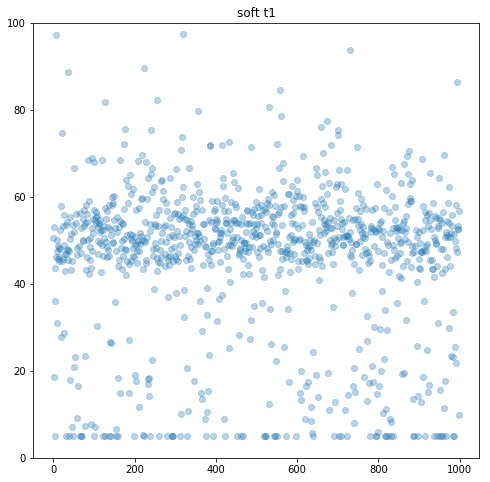

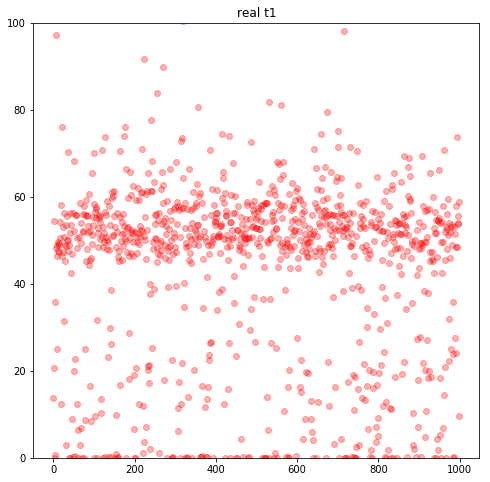

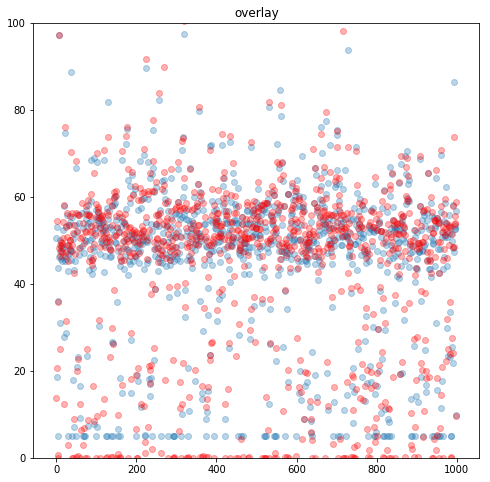

In [11]:
##################################################
##                 t1 raw data                  ##
##################################################


plt.scatter(range(0,len(t1_soft_list)),1e9*t1_soft_list,alpha=0.3)
plt.ylim(0,100)
plt.title("soft t1")
plt.show()

plt.scatter(range(0,len(t1_real_list)),1e9*t1_real_list,alpha=0.3,color="red")
plt.ylim(0,100)
plt.title("real t1")
plt.show()

plt.scatter(range(0,len(t1_soft_list)),1e9*t1_soft_list,alpha=0.3)
plt.scatter(range(0,len(t1_real_list)),1e9*t1_real_list,alpha=0.3,color="red")
plt.title("overlay")
plt.ylim(0,100)
plt.show()

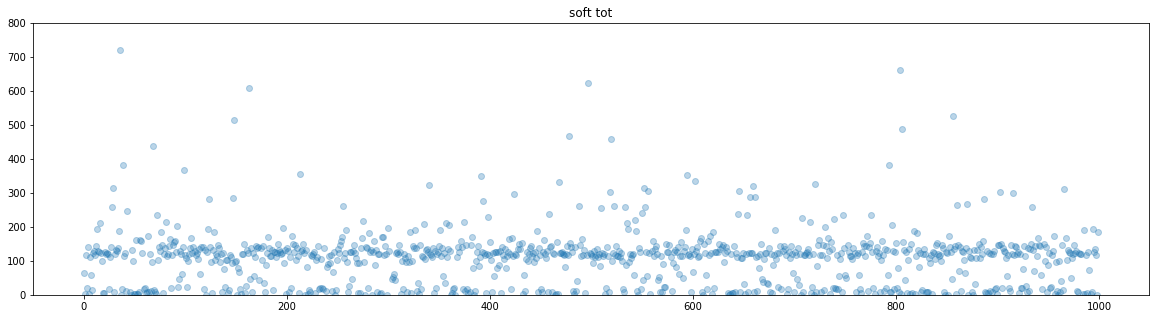

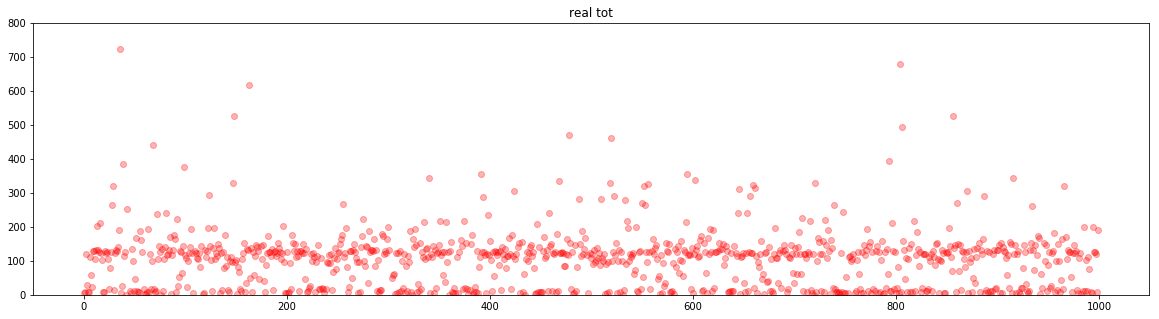

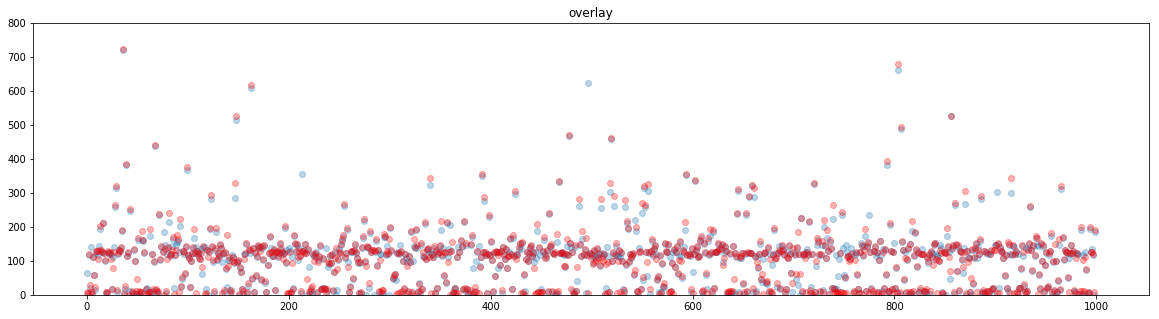

In [7]:
##################################################
##                 tot raw data                  ##
##################################################


plt.scatter(range(0,len(tot_soft_list)),1e9*tot_soft_list,alpha=0.3)
plt.ylim(0,800)
plt.title("soft tot")
plt.show()

plt.scatter(range(0,len(tot_real_list)),1e9*tot_real_list,alpha=0.3,color="red")
plt.ylim(0,800)
plt.title("real tot")
plt.show()

plt.scatter(range(0,len(tot_soft_list)),1e9*tot_soft_list,alpha=0.3)
plt.scatter(range(0,len(tot_real_list)),1e9*tot_real_list,alpha=0.3,color="red")
plt.title("overlay")
plt.ylim(0,800)
plt.show()

In [8]:

from scipy import stats


['t1_slope', 't1_intercept', 't1_r_value', 't1_p_value', 't1_std_err']
[0.97100837918959482, 9.5895595536221209e-10, 0.90974186746757257, 1.8112307739430502e-277, 0.016503181261634005]


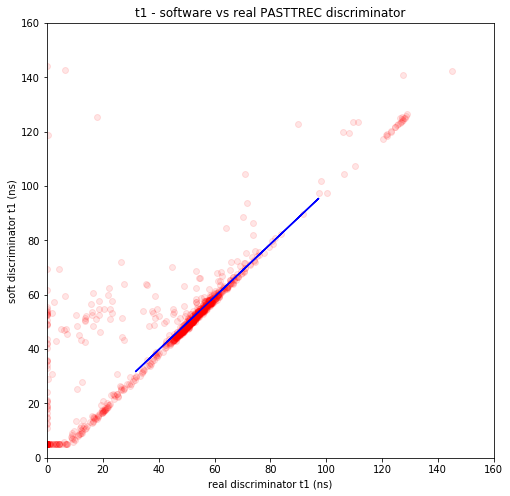

In [9]:
# compare t1 behaviour
plt.rcParams["figure.figsize"] = (8,8)


plt.scatter(1e9*t1_real_list,1e9*t1_soft_list,alpha=0.1,color="red")
plt.xlabel("real discriminator t1 (ns)")
plt.ylabel("soft discriminator t1 (ns)")
plt.xlim(-0,160)
plt.ylim(-0,160)
plt.title("t1 - software vs real PASTTREC discriminator")


mask = (t1_real_list > 30e-9) \
     & (t1_real_list <100e-9) \
     & (t1_soft_list > 30e-9) \
     & (t1_soft_list <100e-9)

t1_slope, t1_intercept, t1_r_value, t1_p_value, t1_std_err = stats.linregress(
    t1_real_list[mask], t1_soft_list[mask]
)

print(["t1_slope", "t1_intercept", "t1_r_value", "t1_p_value", "t1_std_err"])
print([t1_slope, t1_intercept, t1_r_value, t1_p_value, t1_std_err])
#x=1e-9*np.array(range(-100,200))
x=t1_real_list[mask]
plt.plot(1e9*x,1e9*t1_slope*x + 1e9*t1_intercept,label="lin reg",color="blue")

plt.show()

['tot_slope', 'tot_intercept', 'tot_r_value', 'tot_p_value', 'tot_std_err']
[0.93377381034819196, 8.1347309524998647e-09, 0.97605114634480472, 0.0, 0.0080826505882575575]


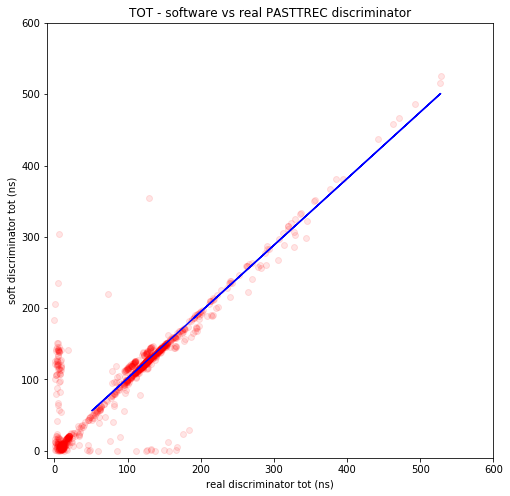

In [10]:
# compare tot behaviour
plt.rcParams["figure.figsize"] = (8,8)


plt.scatter(1e9*tot_real_list,1e9*tot_soft_list,alpha=0.1,color="red")
plt.xlabel("real discriminator tot (ns)")
plt.ylabel("soft discriminator tot (ns)")
plt.xlim(-10,600)
plt.ylim(-10,600)
plt.title("TOT - software vs real PASTTREC discriminator")


mask = (tot_real_list >  50e-9) \
     & (tot_real_list < 600e-9) \
     & (tot_soft_list >  50e-9) \
     & (tot_soft_list < 600e-9)

tot_slope, tot_intercept, tot_r_value, tot_p_value, tot_std_err = stats.linregress(
    tot_real_list[mask], tot_soft_list[mask]
)

print(["tot_slope", "tot_intercept", "tot_r_value", "tot_p_value", "tot_std_err"])
print([tot_slope, tot_intercept, tot_r_value, tot_p_value, tot_std_err])
#x=1e-9*np.array(range(-100,1000))
x=tot_real_list[mask]
plt.plot(1e9*x,1e9*tot_slope*x + 1e9*tot_intercept,label="lin reg",color="blue")

plt.show()

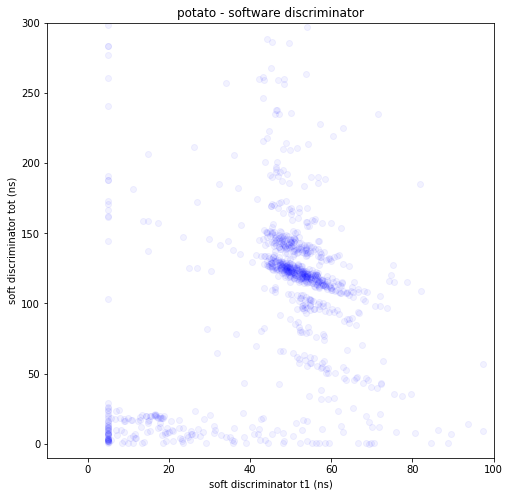

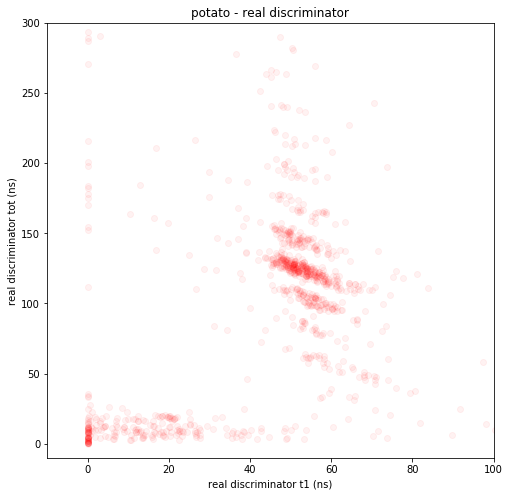

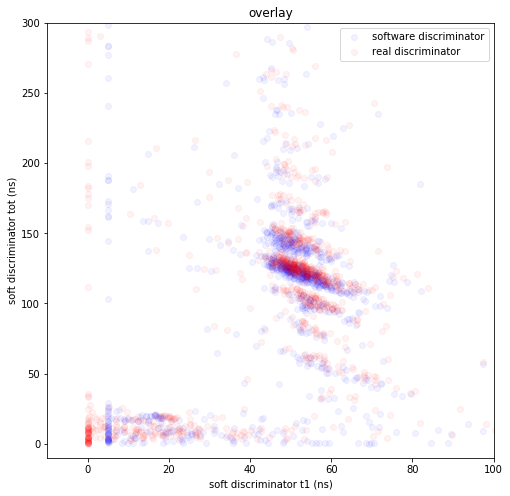

In [23]:
# soft potato
plt.rcParams["figure.figsize"] = (8,8)


plt.scatter(1e9*t1_soft_list,1e9*tot_soft_list,alpha=0.05,color="blue")
plt.xlabel("soft discriminator t1 (ns)")
plt.ylabel("soft discriminator tot (ns)")
plt.xlim(-10,100)
plt.ylim(-10,300)
plt.title("potato - software discriminator")


plt.show()

# real potato
plt.rcParams["figure.figsize"] = (8,8)


plt.scatter(1e9*t1_real_list,1e9*tot_real_list,alpha=0.05,color="red")
plt.xlabel("real discriminator t1 (ns)")
plt.ylabel("real discriminator tot (ns)")
plt.xlim(-10,100)
plt.ylim(-10,300)
plt.title("potato - real discriminator")


plt.show()

#overlay

plt.scatter(1e9*t1_soft_list,1e9*tot_soft_list,alpha=0.05,color="blue",label="software discriminator")
plt.scatter(1e9*t1_real_list,1e9*tot_real_list,alpha=0.05,color="red",label="real discriminator")
plt.xlabel("soft discriminator t1 (ns)")
plt.ylabel("soft discriminator tot (ns)")
plt.xlim(-10,100)
plt.ylim(-10,300)
plt.legend()
plt.title("overlay")


plt.show()


In [24]:
sim_data_list = unpickle("/workdir/ana_signals.pickle")

loading from /workdir/ana_signals.pickle


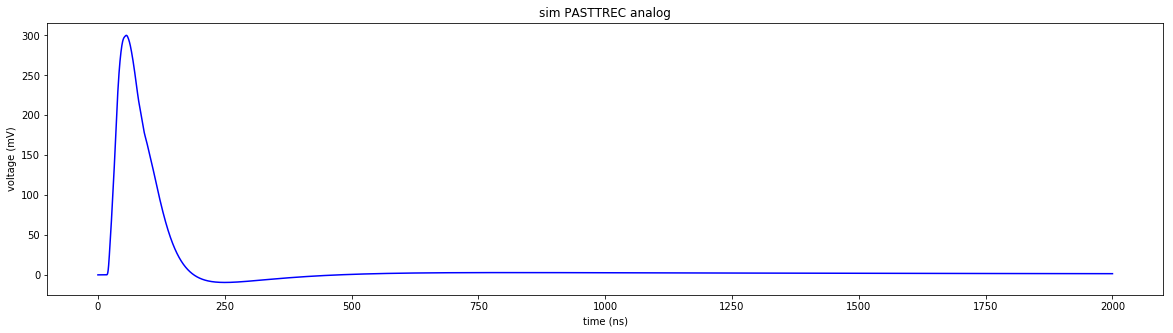

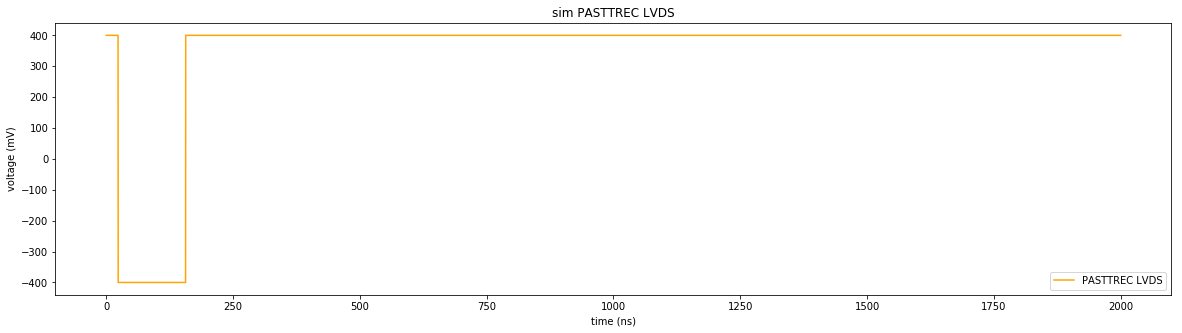

In [28]:
dataset = sim_data_list[1]

time_ns = dataset["time"]*1e9

plt.rcParams["figure.figsize"] = (20,5)

plt.plot(time_ns,1e3*(dataset["v_fee_ana_out"]),color="blue")
plt.title("sim PASTTREC analog")
plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.show()

plt.plot(time_ns,1e3*dataset["v_fee_discr_out"],color="orange",label="PASTTREC LVDS")
plt.title("sim PASTTREC LVDS")
plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.legend()
plt.show()

In [32]:
t1_sim_list  = []
tot_sim_list = []

for dataset in sim_data_list:
    #t1_sim_list += [dataset["t1"]]
    #tot_sim_list += [dataset["tot"]]
    
    dummy, t1_sim, tot_sim = discriminate(dataset["time"],dataset["v_fee_ana_out"],30e-3,8e-3,-4e-3,
                                          start = 0e-9 )
    t1_sim_list += [t1_sim]
    tot_sim_list += [tot_sim]

t1_sim_list  = np.array(t1_sim_list ) 
tot_sim_list = np.array(tot_sim_list) 

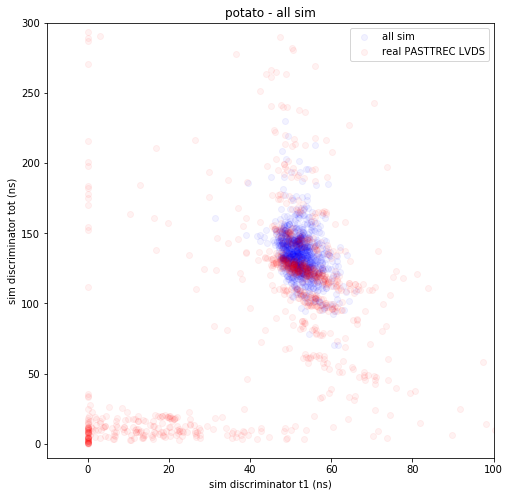

In [40]:
# soft potato
plt.rcParams["figure.figsize"] = (8,8)


plt.scatter(1e9*t1_sim_list+26,1e9*tot_sim_list,alpha=0.05,color="blue",label="all sim")
plt.scatter(1e9*t1_real_list,1e9*tot_real_list,alpha=0.05,color="red",label="real PASTTREC LVDS")
plt.xlabel("sim discriminator t1 (ns)")
plt.ylabel("sim discriminator tot (ns)")
plt.xlim(-10,100)
plt.ylim(-10,300)
plt.legend()
plt.title("potato - all sim")


plt.show()